In [1]:
import numpy
import matplotlib.pyplot as plt
from tqdm import tqdm

# First order

In [2]:
def euler_method(x_initial, y_initial, step, n_iter, f):
    
    h = step
    x = [x_initial]
    y = [y_initial]
    
    for it in tqdm(range(n_iter)):
             
        y.append(y[-1]+h*f(x[-1], y[-1]))
        x.append(x[-1] + h)
        
    return x, y

In [3]:
def hadamard_original_method(x_initial, y_initial, step, n_iter, f, n_approx):

    h = step
    x = [x_initial]
    y = [y_initial]
    y_approxs = []
    
    for it in tqdm(range(n_iter)):
                
        y_approx = y[-1]
        y_approxs.append([y_approx])
        
        for _ in range(n_approx):
            
            y_approx = y[-1] + (f(x[-1], y[-1]) + f(x[-1]+h, y_approx))/2*h
            y_approxs[-1].append(y_approx)
            
        y.append(y_approx)
    
        x.append(x[-1] + h)

    return x, y, y_approxs

In [4]:
def hadamard_modified_method(x_initial, y_initial, step, n_iter, f):

    h = step
    x = [x_initial]
    y = [y_initial]
    y_approxs = []
    
    for it in tqdm(range(n_iter)):
        
        tmp = y[-1] + h * f(x[-1], y[-1])        
        y.append(y[-1]+h*(f(x[-1], y[-1]) + f(x[-1]+h, tmp))/2)
        x.append(x[-1] + h)
        y_approxs.append(tmp)
        
    return x, y, y_approxs

100%|█████████████████████████████████████| 120/120 [00:00<00:00, 460069.91it/s]


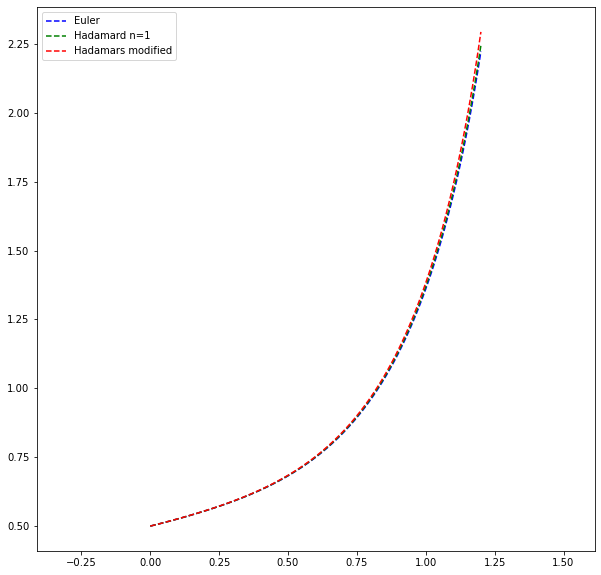

In [5]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.axis("equal")
f=lambda x, y: x**3+y**2
x_initial = 0
y_initial = 0.5
step = 0.01
n_iter = 120
n_approx = 1

x, y =             euler_method(x_initial, y_initial, step, n_iter, f)
plt.plot(x, y, "--", color="blue")
x, y, _ = hadamard_original_method(x_initial, y_initial, step, n_iter, f, n_approx=n_approx)
plt.plot(x, y, "--", color="green")
x, y, _ =   hadamard_modified_method(x_initial, y_initial, step, n_iter, f)
plt.plot(x, y, "--", color="red")
plt.legend(["Euler", f"Hadamard n={n_approx}", "Hadamars modified"])
plt.show()

# Second order

In [6]:
def euler_method_second(x_initial, y_initial, u_initial, step, n_iter, f):
    
    h = step
    x = [x_initial]
    y = [y_initial]
    u = [u_initial]
    
#     for it in tqdm(range(n_iter)):
    for it in range(n_iter):
        
        y.append(y[-1]+h*u[-1])
        u.append(u[-1]+h*f(x[-1], y[-1], u[-1]))
        x.append(x[-1] + h)
        
    return x, y, u

In [7]:
def hadamard_original_method_second(x_initial, y_initial, u_initial, step, n_iter, f, n_approx):

    h = step
    x = [x_initial]
    y = [y_initial]
    u = [u_initial]
        
    for it in tqdm(range(n_iter)):
                
        y_approx = y[-1]
        u_approx = u[-1]

        for _ in range(n_approx):
            
            y_approx = y[-1] + (u[-1] + u_approx)/2*h
            
            u_approx = u[-1] + (f(x[-1], y[-1], u[-1]) + f(x[-1]+h, y_approx, u_approx))/2*h
            
        y.append(y_approx)
        u.append(u_approx)

    
        x.append(x[-1] + h)

    return x, y, u

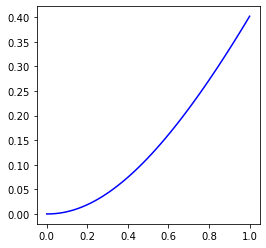

In [8]:
fig, ax = plt.subplots(figsize=(4, 4))
f=lambda x, y, u: (1-u**2)/(1+u**2)
x_initial = 0
y_initial = 0
u_initial = 0
step = 1/100
n_iter = 100
x_1, y_1, u_1 = euler_method_second(x_initial, y_initial, u_initial, step, n_iter, f)
plt.plot(x_1, y_1, color="blue")
plt.show()

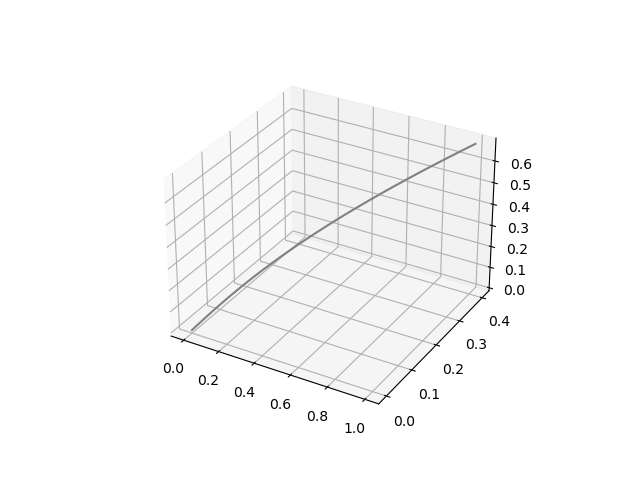

In [9]:
%matplotlib widget
ax = plt.axes(projection='3d')
ax.plot3D(x_1, y_1, u_1, 'gray')
plt.show()

## Sturm-Liouville problem

In [10]:
f = lambda x, y, u: 1/(x**2+y**2)
f = lambda x, y, u: -numpy.sin(y)-u/10

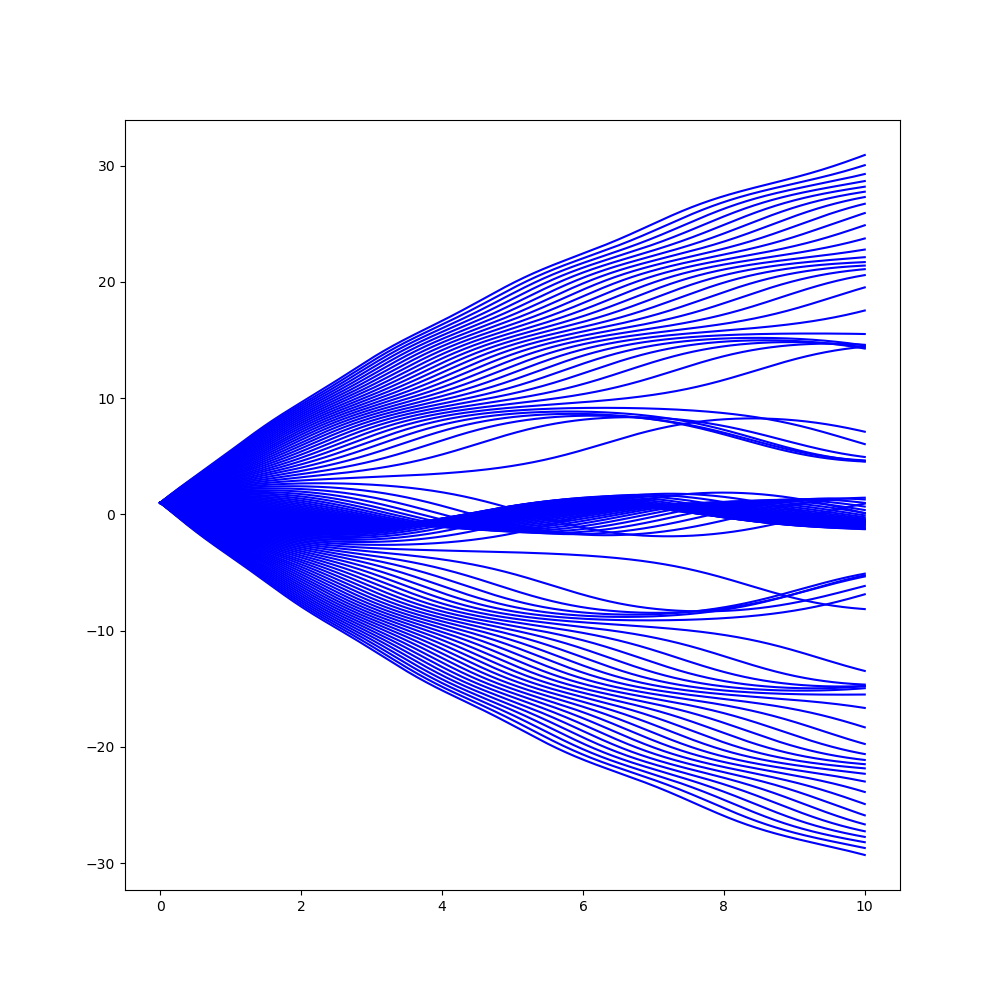

In [11]:
fig, ax = plt.subplots(figsize=(10, 10))
x_initial = 0
y_initial = 1
u_initial = 1
step = 1/1000
n_iter = 10000

for u_initial in numpy.arange(-5, 5, 0.1):
    x_1, y_1, u_1 = euler_method_second(x_initial, y_initial, u_initial, step, n_iter, f)
    ax.plot(x_1, y_1, color="blue")
plt.show()